## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


## Data preparation

In [2]:
df_sessions = pd.read_csv('./data/train/ga_sessions.csv', low_memory=False)

df_hits = pd.read_csv('./data/train/ga_hits.csv', low_memory=False)

In [3]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
df_hits.describe()

,hit_time,hit_number,event_value
count,6.566148e+06,1.572647e+07,0.0
mean,2.091050e+05,2.356715e+01,NaN
std,4.032110e+05,2.887713e+01,NaN
min,0.000000e+00,1.000000e+00,NaN
25%,2.412000e+04,7.000000e+00,NaN
50%,8.994100e+04,1.500000e+01,NaN
75%,2.195352e+05,2.900000e+01,NaN
max,1.315688e+07,5.000000e+02,NaN


In [5]:
df_hits.shape, df_sessions.shape

((15726470, 11), (1860042, 18))

In [6]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [7]:
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [8]:
df_hits['is_target_action'] = df_hits['event_action'].isin(target_actions)

In [9]:
df_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,is_target_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN,False
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN,False
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN,False
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN,False
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN,False
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN,False
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN,False
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN,False


In [10]:
session_target_action = df_hits.groupby('session_id')['is_target_action'].any().reset_index()

session_target_action

,session_id,is_target_action
0,1000009318903347362.1632663668.1632663668,False
1,1000010177899156286.1635013443.1635013443,False
2,1000013386240115915.1635402956.1635402956,False
3,1000017303238376207.1623489300.1623489300,False
4,1000020580299877109.1624943350.1624943350,False
...,...,...
1734605,999960188766601545.1626816843.1626816843,False
1734606,99996598443387715.1626811203.1626811203,False
1734607,999966717128502952.1638428330.1638428330,False
1734608,999988617151873171.1623556243.1623556243,False


In [11]:
df_sessions = pd.merge(df_sessions, session_target_action, on='session_id', how='left')
df_sessions['is_target_action'].fillna(False, inplace=True)
df_sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,False
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,False
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,False
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,False
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,False
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,False
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,False
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,False


## Data Cleaning

In [12]:
df_sessions.isna().sum() / len(df_sessions) * 100


session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
is_target_action             0.000000
dtype: float64

In [13]:
unused_cols = ['session_id','client_id', 'visit_date', 'visit_time', 'visit_number', 'device_model']

df_sessions.drop(columns=unused_cols, inplace=True)

df_sessions

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,False
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,False
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,False
3,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,False
4,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow,False
1860038,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,390x844,Safari,Russia,Stavropol,False
1860039,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,False
1860040,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,False


In [30]:
df_sessions.iloc[0].to_json('./examples/example-1.json')

In [15]:
df_sessions.isna().sum() / len(df_sessions) * 100


utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
is_target_action             0.000000
dtype: float64

In [16]:
categories = [col for col in df_sessions.columns if col.startswith('utm_') or col.startswith('device_') or col.startswith('geo_')]


for category in categories:
    print('------------------')
    print(category, '\n')
    
    print("Описательные стастистики \n",df_sessions[category].describe(), '\n')

------------------
utm_source 

Описательные стастистики 
 count                  1859945
unique                     293
top       ZpYIoDJMcFzVoPFsHGJL
freq                    578290
Name: utm_source, dtype: object 

------------------
utm_medium 

Описательные стастистики 
 count     1860042
unique         56
top        banner
freq       552272
Name: utm_medium, dtype: object 

------------------
utm_campaign 

Описательные стастистики 
 count                  1640439
unique                     412
top       LTuZkdKfxRGVceoWkVyg
freq                    463481
Name: utm_campaign, dtype: object 

------------------
utm_adcontent 

Описательные стастистики 
 count                  1524427
unique                     286
top       JNHcPlZPxEMWDnRiyoBf
freq                   1006599
Name: utm_adcontent, dtype: object 

------------------
utm_keyword 

Описательные стастистики 
 count                   777981
unique                    1219
top       puhZPIYqKXeFPaUviSjo
freq                 

In [17]:
for utm in ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent']:
    mode = df_sessions[utm].mode()[0]
    
    df_sessions[utm] = df_sessions[utm].fillna(mode)

df_sessions.isna().sum() / len(df_sessions) * 100



utm_source                   0.000000
utm_medium                   0.000000
utm_campaign                 0.000000
utm_adcontent                0.000000
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
is_target_action             0.000000
dtype: float64

In [18]:
df_sessions.utm_keyword.fillna('unknown', inplace=True)

df_sessions.utm_keyword.isna().sum()

0

In [19]:
apple_brand = df_sessions.device_brand == 'Apple'
df_sessions.loc[apple_brand, 'device_os'] = 'iOS'

df_sessions.isna().sum() / len(df_sessions) * 100

utm_source                   0.000000
utm_medium                   0.000000
utm_campaign                 0.000000
utm_adcontent                0.000000
utm_keyword                  0.000000
device_category              0.000000
device_os                   39.039334
device_brand                19.740307
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
is_target_action             0.000000
dtype: float64

In [20]:
df_sessions.loc[(~apple_brand) & (df_sessions.device_os.isna()), 'device_os'] = 'Android'
df_sessions.isna().sum() / len(df_sessions) * 100


utm_source                   0.000000
utm_medium                   0.000000
utm_campaign                 0.000000
utm_adcontent                0.000000
utm_keyword                  0.000000
device_category              0.000000
device_os                    0.000000
device_brand                19.740307
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
is_target_action             0.000000
dtype: float64

In [21]:
## Заполним apple_brand значением Apple

apple_brand = df_sessions.device_os == 'iOS'
df_sessions.loc[apple_brand, 'device_brand'] = 'Apple'

In [22]:
df_sessions.loc[~apple_brand, 'device_brand'] = df_sessions.device_brand.mode()[0]


In [23]:
df_sessions.isna().sum() / len(df_sessions) * 100


utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
utm_keyword                 0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
is_target_action            0.0
dtype: float64

## Data Visualization

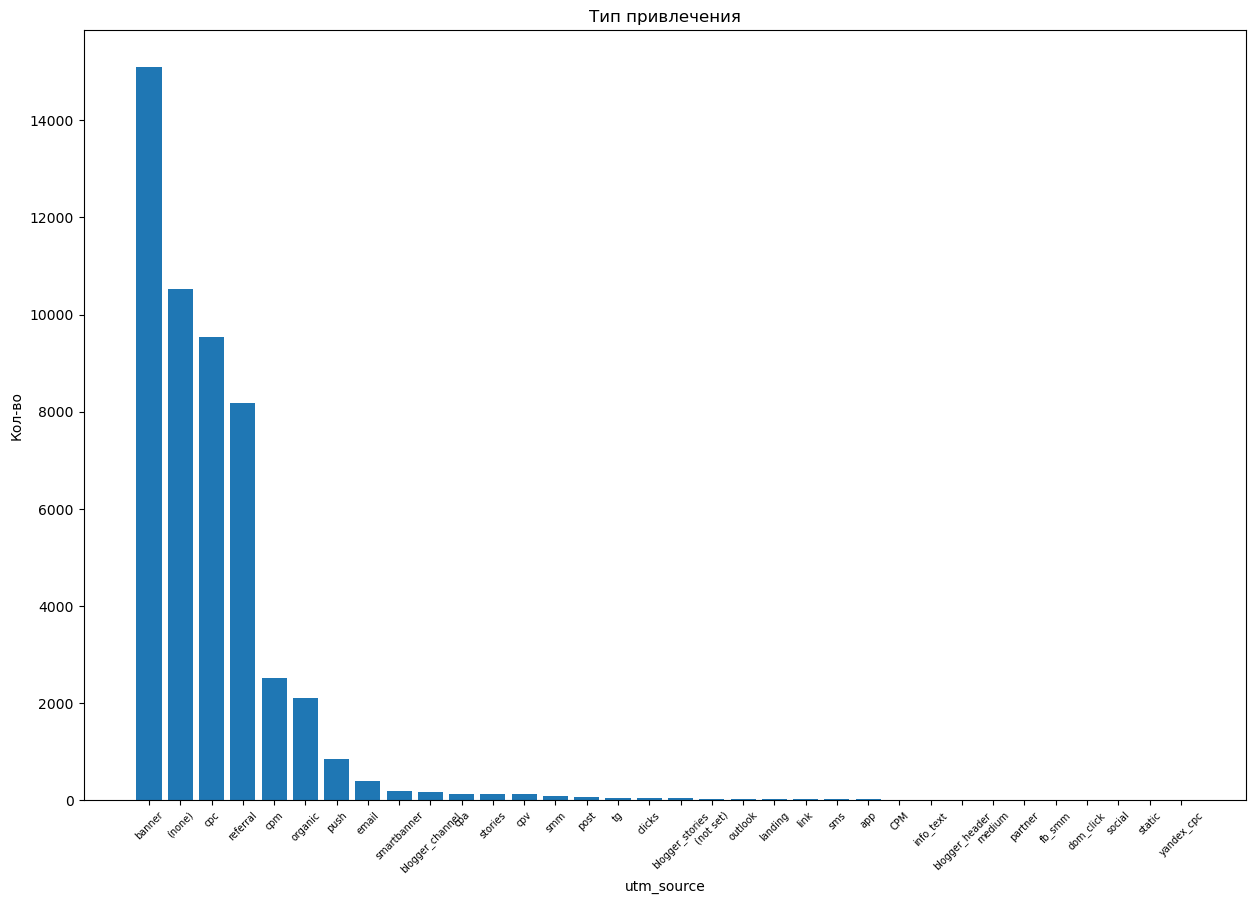

In [24]:
grouped_by_utm_medium = df_sessions[df_sessions.is_target_action == True].groupby('utm_medium').agg({'utm_medium': 'first', 'is_target_action': 'sum'}).rename(columns={'is_target_action': 'target_action_count'}).sort_values(by='target_action_count', ascending=False)


plt.figure(figsize=(15, 10))


plt.bar(grouped_by_utm_medium['utm_medium'], grouped_by_utm_medium['target_action_count'])
plt.title('Тип привлечения')
plt.xlabel('utm_source')
plt.ylabel('Кол-во')
plt.xticks(rotation=45, fontsize=7)
plt.show()

In [25]:
print("Топ типов привлечения")
print(grouped_by_utm_medium.head(4))


Топ типов привлечения
           utm_medium  target_action_count
utm_medium                                
banner         banner                15107
(none)         (none)                10531
cpc               cpc                 9529
referral     referral                 8181


In [26]:
grouped_by_utm_campaign = df_sessions[df_sessions.is_target_action == True].groupby('utm_campaign').agg({'utm_campaign': 'unique', 'is_target_action': 'sum'}).rename(columns={'is_target_action': 'target_action_count'}).sort_values(by='target_action_count', ascending=False)

print("Топ каналов привлечения")
print(grouped_by_utm_campaign.head(4))


Топ каналов привлечения
                                utm_campaign  target_action_count
utm_campaign                                                     
LTuZkdKfxRGVceoWkVyg  [LTuZkdKfxRGVceoWkVyg]                26180
LEoPHuyFvzoNfnzGgfcd  [LEoPHuyFvzoNfnzGgfcd]                 9348
gecBYcKZCPMcVYdSSzKP  [gecBYcKZCPMcVYdSSzKP]                 4545
FTjNLDyTrXaWYgZymFkV  [FTjNLDyTrXaWYgZymFkV]                 2447


In [27]:
def build_histogram(variable):
    
    plt.figure(figsize=(20, 10))
    
    df_grouped = df_sessions.groupby([variable, 'is_target_action']).size().unstack(fill_value=0)
    df_grouped.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribution of is_target_action by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='is_target_action')
    plt.show();

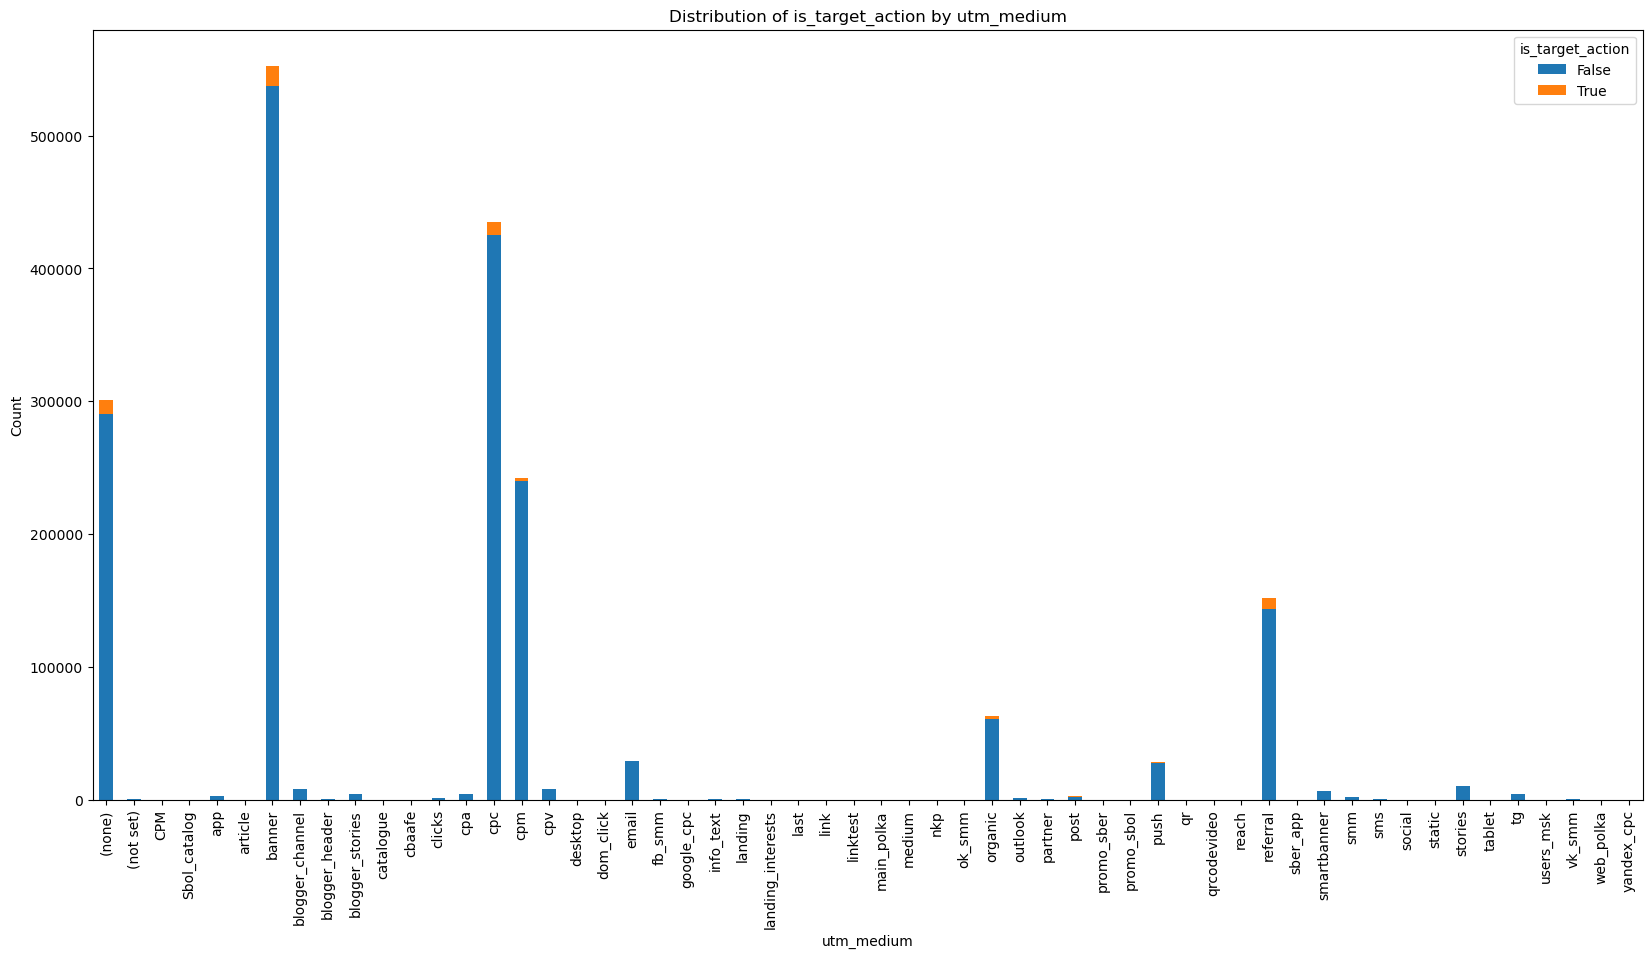

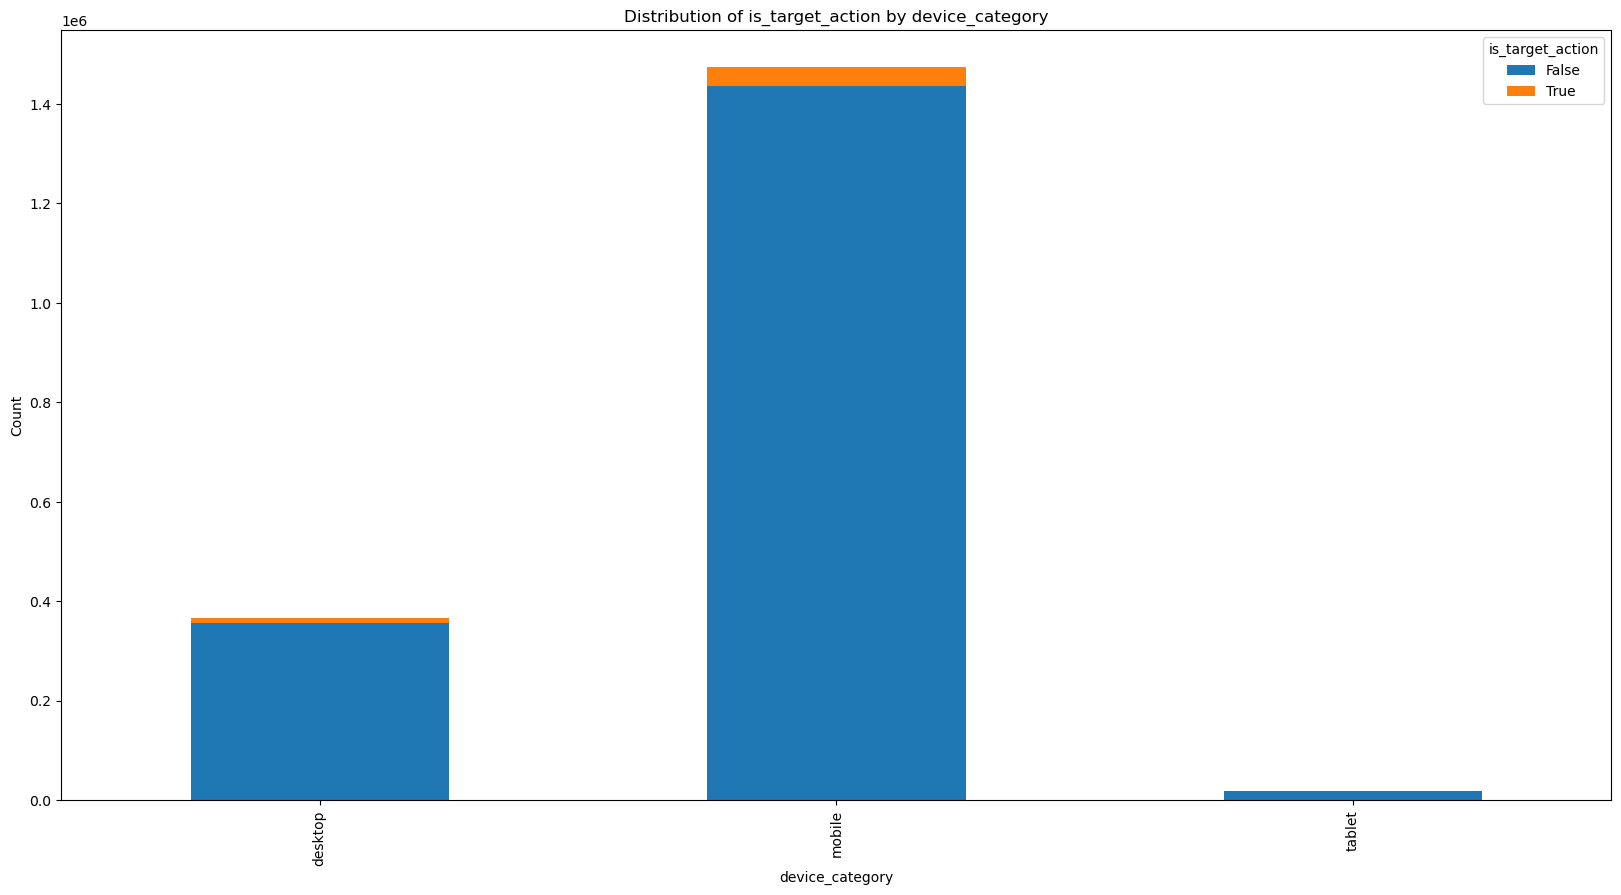

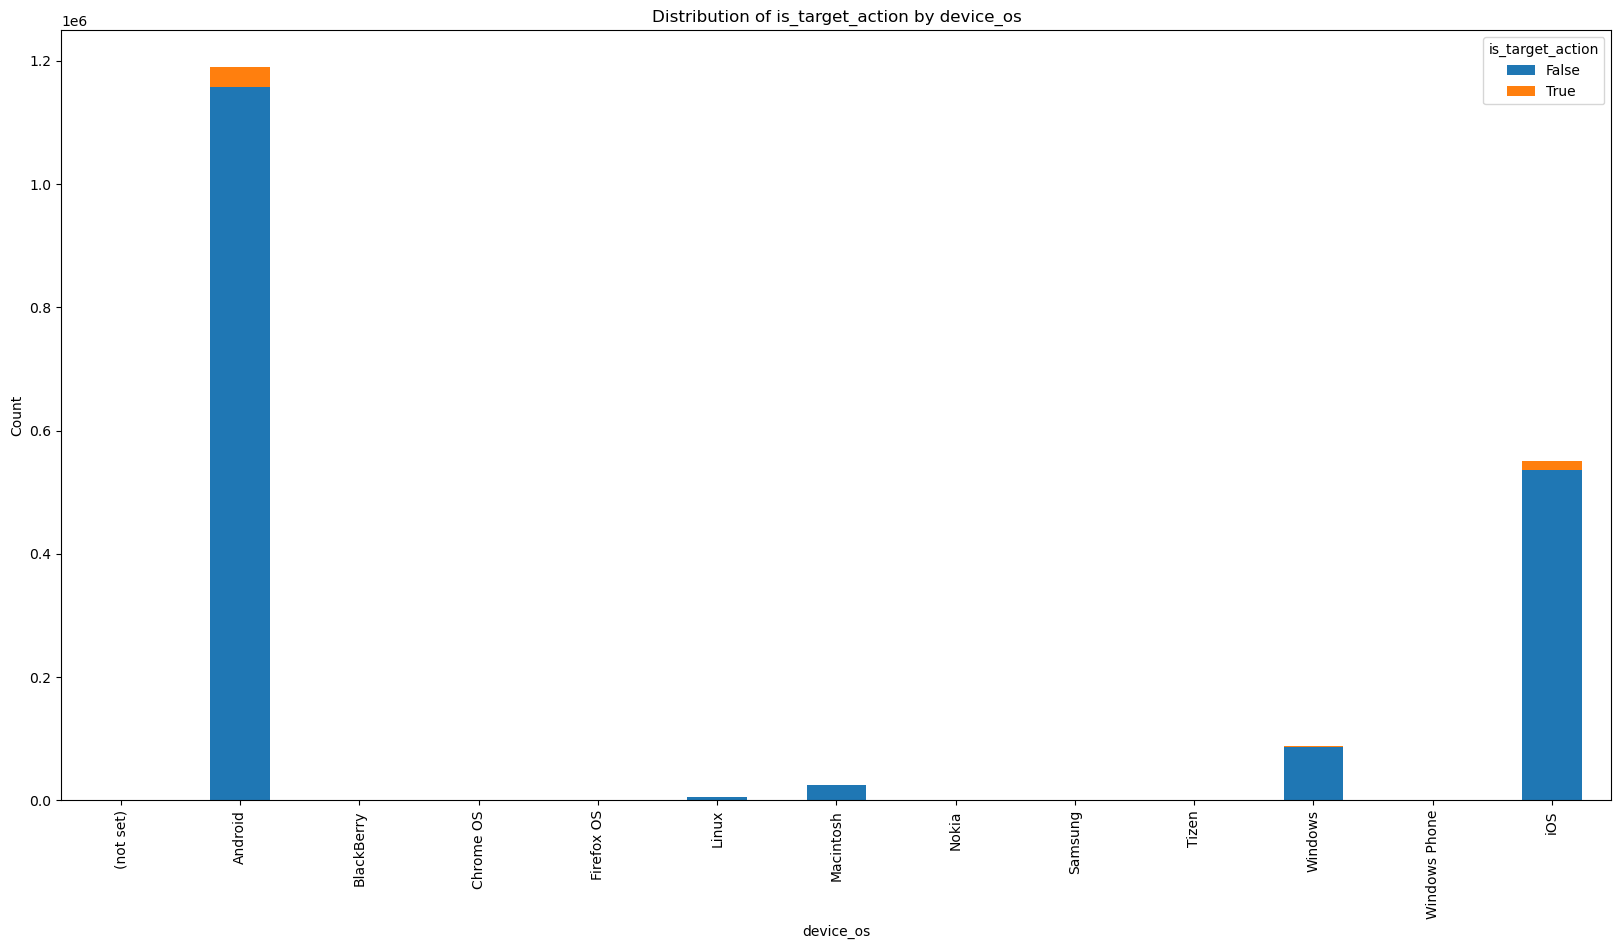

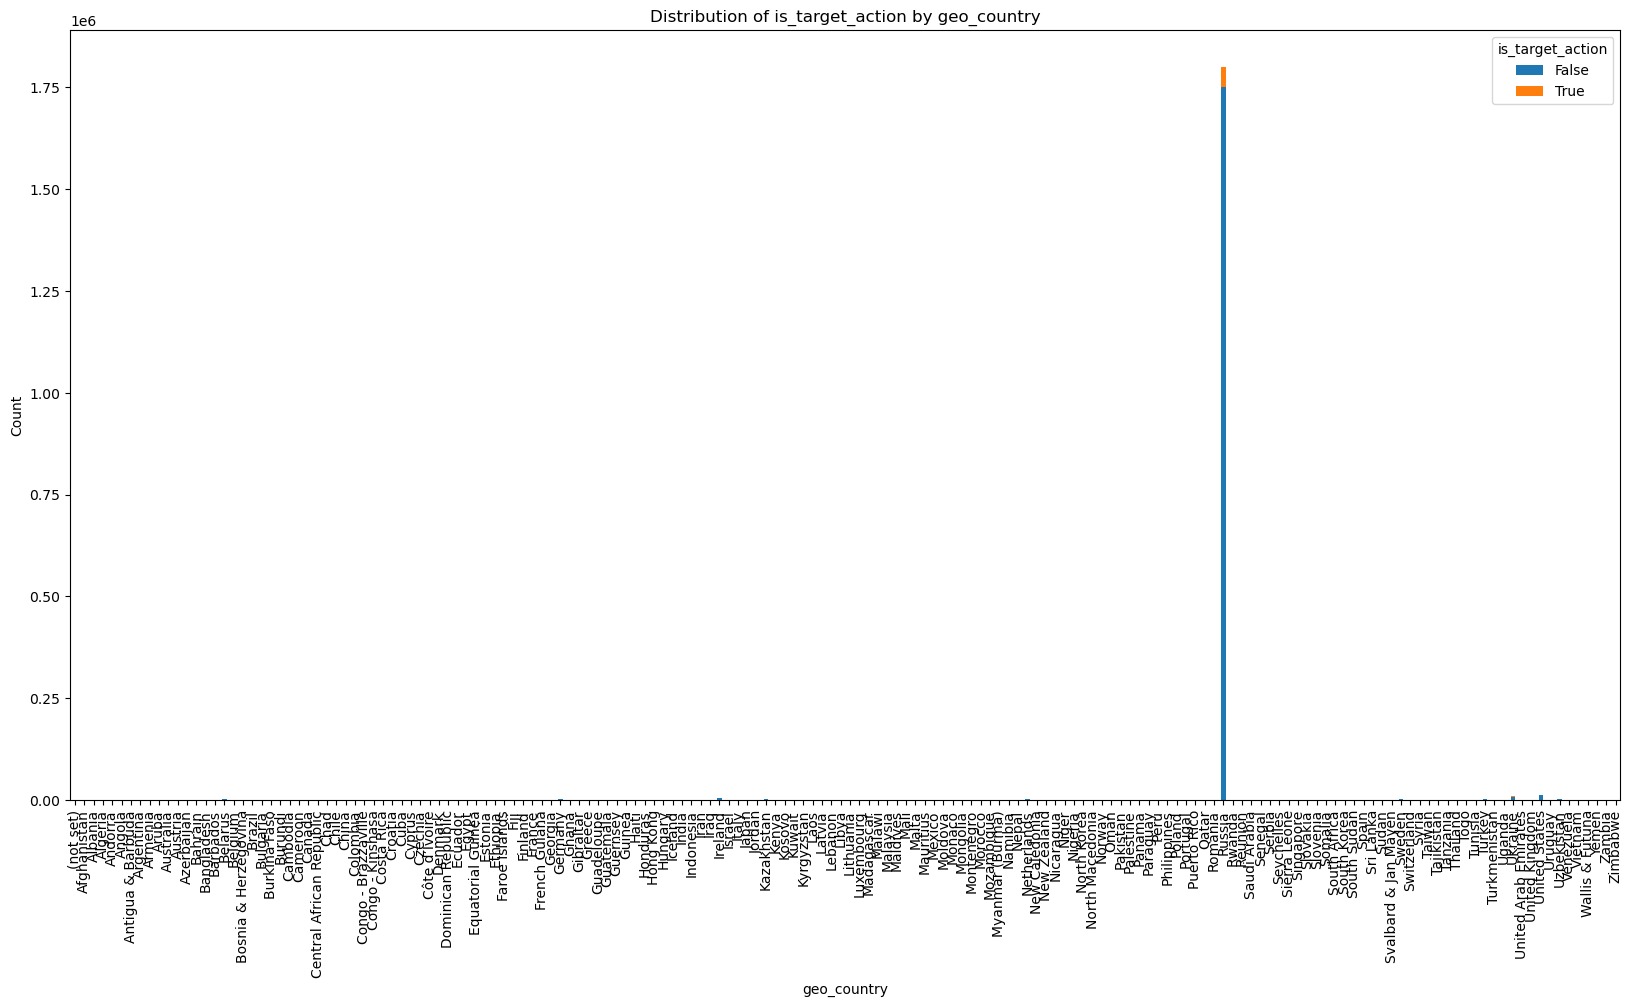

In [31]:
variables = ['utm_medium', 'device_category', 'device_os', 'geo_country']


for variable in variables:
    build_histogram(variable)

In [33]:
df_sessions.to_csv('./data/train/df_sessions.csv', index=False)